In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Import data
#Create dataframe using dataset
#View data using groupby
data = pd.read_csv('Desktop/TJ_Dataset.csv', header=0)
df1 = pd.DataFrame({'CID': data['Clinic ID'],'ID': data['Unique_Identifier'], 'Gender': data['Gender'], 'Nationality': data['Nationality'], 'Test_Date': data['Test_Date'], 'Profile_Name': data['Profile_Name'],'Age': data['Age'],'Score': data['Score'],'Conclusion': data['Conclusion'],'Score_Level': data['Score_Level'],'Name': data['Name'], 'T1': data['Threshold_1'],'T2': data['Threshold_2'],'SI_Conversion': data['SI_Conversion']})
df1.groupby(['CID','ID', 'Gender', 'Age', 'Nationality', 'Test_Date', 'Profile_Name', 'Score_Level', 'Score', 'T1', 'T2', 'SI_Conversion', 'Name']).count().unstack(fill_value=0)

Conclusion  \
Name                                                                                                                              Albumin    
CID ID                               Gender Age Nationality Test_Date Profile_Name Score_Level Score  T1    T2    SI_Conversion              
11  003d25e3fac5a1d2aa4ba502ffb77b5b F      67  SINGAPOREAN 24/05/17  LIFE1        0           0.00   0.0   0.0   1.0000                 0   
                                                                                                      60.0  0.0   1.0000                 0   
                                                                                   1           0.50   0.0   1.0   1.0000                 0   
                                                                                               0.80   0.5   1.3   1.0000                 0   
                                                                                               2.95   4.4   0.0   1.0000                 0   
                                                                                               3.20   2.0   3.7   1.0000                 0   
                                                                                               3.40   2.3   4.7   1.0000                 0   
                                                                                               3.50   3.3   5.1   1.0000                 0   
                                                                                               4.10   2.4   5.7   1.0000                 0   
                                                                                               4.70   3.7   5.1   1.0000                 1   
                                                                                               5.60   0.0   6.0   1.0000                 0   
                                                                                               6.60   4.0   10.0  1.0000                 0   
                                                                                               7.90   6.2   8.2   1.0000                 0   
                                                                                               9.50   8.4   10.4  1.0000                 0   
                                                                                               9.90   2.0   10.0  1.0000                 0   
                                                                                               16.00  8.0   40.0  1.0000                 0   
                                                                                               22.00  22.0  0.0   1.0000                 0   
                                                                                               31.00  27.0  32.0  1.0000                 0   
                                                                                               32.00  10.0  46.0  1.0000                 0   
                                                                                               34.00  32.0  36.0  1.0000                 0   
                                                                                               36.00  15.0  41.0  1.0000                 0   
                                                                                               38.00  38.0  52.0  1.0000                 0   
                                                                                               40.00  36.0  120.0 1.0000                 0   
                                                                                               48.00  40.0  75.0  1.0000                 0   
                                                                                               57.00  38.0  0.0   38.6698                0   
                                                                                               92.00  130.0 0.0   38.6698                0   
          

In [3]:
#Filter Records to 1 patient (Experimental)
# df1= df.loc[df['ID'] == '0079e1b73a94ba341f53ca22c6910782']
# df1

In [4]:
#Classify Dependent Variable to 2 outputs for logistic regression
df1.loc[df1.Conclusion == 'Desirable', 'Conclusion'] = 'Desirable'
df1.loc[df1.Conclusion != 'Desirable', 'Conclusion'] = 'Not Desirable'

In [5]:
#View first 5 records of dataset
df1.head()

,CID,ID,Gender,Nationality,Test_Date,Profile_Name,Age,Score,Conclusion,Score_Level,Name,T1,T2,SI_Conversion
0,11,cb1d683b1f24f3c494138f6cbaf2ce4c,M,SINGAPOREAN,16/01/16,"LIFE3 MALE,FPSAP",59,4.4,Desirable,1,Albumin,3.7,5.1,1.0
1,11,cb1d683b1f24f3c494138f6cbaf2ce4c,M,SINGAPOREAN,10/01/17,LIFE3 MALE,60,4.5,Desirable,1,Albumin,3.7,5.1,1.0
2,11,b2fa0f5835ef1847636d5720fc9f30c9,F,SINGAPOREAN,09/07/16,"LIFE2,HBA1CP",83,4.2,Desirable,1,Albumin,3.7,5.1,1.0
3,11,3f663f8eadfcf405cb7bdb6bf7e14d1a,F,SINGAPOREAN,07/03/17,LIFE1,76,4.0,Desirable,1,Albumin,3.7,5.1,1.0
4,11,f57a87f0625c6b3e44ce79af78b34f60,F,SINGAPOREAN,07/01/16,LIFE2,58,4.3,Desirable,1,Albumin,3.7,5.1,1.0


In [6]:
#Convert dependent variable to numerical output for logistic regression due to binary restriction in logistic regression
textReplace = {'Desirable': 0, 'Not Desirable': 1, 'High': 1, 'Not High': 0, 'Low': 1, 'Not Low': 0}
df1.Conclusion =[textReplace[i] for i in df1.Conclusion]

In [7]:
#View number of rows per outcome type
df1['Conclusion'].value_counts()

0    13559
1     9868
Name: Conclusion, dtype: int64

In [8]:
#Data Exploration
df1

,CID,ID,Gender,Nationality,Test_Date,Profile_Name,Age,Score,Conclusion,Score_Level,Name,T1,T2,SI_Conversion
0,11,cb1d683b1f24f3c494138f6cbaf2ce4c,M,SINGAPOREAN,16/01/16,"LIFE3 MALE,FPSAP",59,4.4,0,1,Albumin,3.7,5.1,1.0
1,11,cb1d683b1f24f3c494138f6cbaf2ce4c,M,SINGAPOREAN,10/01/17,LIFE3 MALE,60,4.5,0,1,Albumin,3.7,5.1,1.0
2,11,b2fa0f5835ef1847636d5720fc9f30c9,F,SINGAPOREAN,09/07/16,"LIFE2,HBA1CP",83,4.2,0,1,Albumin,3.7,5.1,1.0
3,11,3f663f8eadfcf405cb7bdb6bf7e14d1a,F,SINGAPOREAN,07/03/17,LIFE1,76,4.0,0,1,Albumin,3.7,5.1,1.0
4,11,f57a87f0625c6b3e44ce79af78b34f60,F,SINGAPOREAN,07/01/16,LIFE2,58,4.3,0,1,Albumin,3.7,5.1,1.0
5,11,f57a87f0625c6b3e44ce79af78b34f60,F,SINGAPOREAN,06/06/17,LIFE1,59,4.2,0,1,Albumin,3.7,5.1,1.0
6,11,753f1dffc933b14124ba5971430e0dcc,M,MALAYSIAN,11/01/16,LIFE3 MALE,51,4.2,0,1,Albumin,3.7,5.1,1.0
7,11,753f1dffc933b14124ba5971430e0dcc,M,MALAYSIAN,17/12/16,LIFE3 MALE,52,4.1,0,1,Albumin,3.7,5.1,1.0
8,11,0079e1b73a94ba341f53ca22c6910782,F,SINGAPOREAN,14/01/16,LIFE1,44,3.9,0,1,Albumin,3.7,5.1,1.0
9,11,ab3e7156a3d9af00b20c7fd97a318bf6,M,SINGAPOREAN,07/03/17,LIFE1,68,3.9,0,1,Albumin,3.7,5.1,1.0


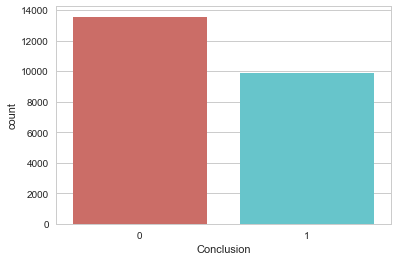

<Figure size 432x288 with 0 Axes>

In [9]:
#View number of rows per outcome type
sns.countplot(x='Conclusion', data=df1, palette='hls')
plt.show()
plt.savefig('Medical Test Results')

In [10]:
#Data Exploration
df1.groupby(['ID', 'Gender', 'Age', 'Nationality', 'Test_Date', 'Profile_Name', 'Name']).mean().unstack(fill_value=0)

CID  \
Name                                                                                      Albumin    
ID                               Gender Age Nationality Test_Date Profile_Name                       
003d25e3fac5a1d2aa4ba502ffb77b5b F      67  SINGAPOREAN 24/05/17  LIFE1                         11   
0079e1b73a94ba341f53ca22c6910782 F      44  SINGAPOREAN 14/01/16  LIFE1                         11   
                                        45  SINGAPOREAN 08/06/16  LP5                            0   
                                                        18/10/16  UA                             0   
00d64d073ff05912189aa31bf8ce5d17 F      55  SINGAPOREAN 24/07/17  HLP3                           0   
00f3ce1c7437a60280aa0268e74550ef F      68  SINGAPOREAN 16/10/16  LIFE3 FEMALE                  11   
                                        69  SINGAPOREAN 09/09/17  LIFE3 FEMALE                  13   
                                                        18/09/17  UFEME(FOC)                     0   
020971cfb58c7bc5efaf56eac237eeef M      58  SINGAPOREAN 09/11/16  LIFE3 MALE,HBA1CP             11   
021ded5c60a28a425a50a8a580f5a0a1 M      35  INDONESIAN  11/11/17  LIFE1                         13   
02ae9d11341d75b3fa1116a73f98fab3 M      75  SINGAPOREAN 20/01/17  TP4,K                          0   
02b0c4f80eb74c541b4fe168f996cd34 M      46  -           30/03/17  RHP1N,FBC                      0   
03664e3f947017c10b3cd34fa4f9e614 M      43  SINGAPOREAN 23/12/16  LP7,HBA1CP,UMAP                0   
0379b4fa0479b392b77348e7527c75a6 F      77  SINGAPOREAN 25/10/16  LIFE1                         11   
03d53add755405ef80fbca611dc779c0 F      33  SINGAPOREAN 24/03/16  LIFE3 FEMALE                  11   
0483886f6a9dc55af4c98265f603b1c1 F      44  SINGAPOREAN 09/03/17  HLP1                           0   
                                        45  SINGAPOREAN 05/05/17  LIFE3 FEMALE                  13   
054581ea7e73e95d28c0f994f2338e40 F      35  SINGAPOREAN 30/01/16  LIFE3 FEMALE,PAP              11   
058dd83e3886356f6ae93bc7097ac321 F      35  INDIAN      13/02/16  LIFE3 FEMALE,HBA1CP           11   
064986a009327172e10e95e45fb5b307 F      30  SINGAPOREAN 27/01/16  LIFE3 FEMALE                  11   
06c1c505d703cd44cf6c82928b412d9f F      73  SINGAPOREAN 19/04/16  LIFE2                         11   
                                        74  SINGAPOREAN 15/04/17  LIFE1                         11   
08c31ec9e0901ed3ea26bd1d443bebbf M      50  SINGAPOREAN 07/02/17  LIFE3 MALE                    11   
08d4bf28bc1c6987e4fb77e523266dbf M      52  SINGAPOREAN 27/04/16  LIFE3 MALE                    11   
                                        54  SINGAPOREAN 31/10/17  LIFE1                         11   
09c3ec22be1ceefa695f48c57efb6075 M      19  KOREAN      07/03/17  HLP3,WPP3                      0   
0a1415cf7d588c17201119b9b8749731 F      21  SINGAPOREAN 02/05/17  UFEME(FOC),STOB (FOC)          0   
                                                        23/04/17  LIFE2,PBF (FREE)              11   
0a49b8e857b46b878e6ccef2e88f105e F      57  SINGAPOREAN 12/05/16  LIFE3 FEMALE                  11   
0a8d3e5e56480de2fc52d44fa54842bf F      43  SINGAPOREAN 29/04/17  LIFE3 FEMALE                  11   
...                                                                                            ...   
f7cef792ad41ca6b6c54a81686ef995e M      52  FILIPINO    20/05/17  LP1                            0   
                                        53  FILIPINO    19/10/17  UA                             0   
f82ce349635ceac897fe71e1411f2532 F      47  SINGAPOREAN 01/02/17  LIFE3 FEMALE,PBF (FREE)       11   
f8def81f902f91b6fe5c4ccdda64c527 M      75  SINGAPOREAN 17/03/16  LIFE1,HBA1CP                  11   
                                        76  SINGAPOREAN 10/06/17  LIFE1,UMAP                    11   
f932b267061312942db6f8a529c81461 F      64  SINGAPOREAN 12/08/17  LIFE1                         11   
f946f5a4b447611

In [11]:
#Data Exploration
df1.groupby(['Gender']).mean().unstack(fill_value=0)

               Gender
CID            F         11.523540
               M         11.435565
Age            F         50.342480
               M         49.632667
Score          F         34.312622
               M         34.824443
Conclusion     F          0.421240
               M          0.421194
Score_Level    F          0.912631
               M          0.898469
T1             F         26.870493
               M         26.684254
T2             F         27.371766
               M         26.952001
SI_Conversion  F          5.304435
               M          5.313539
dtype: float64

In [12]:
#Data Exploration
df1.groupby(['Age']).mean().unstack(fill_value=0)

               Age
CID            13     11.000000
               15     11.000000
               16     11.181818
               17     11.000000
               18     11.212766
               19     13.000000
               20     11.430769
               21     11.023529
               22     11.295455
               23     11.531469
               24     12.577236
               25     11.000000
               26     11.136364
               27     11.536585
               28     12.293023
               29     12.489362
               30     11.662162
               31     11.684358
               32     11.873786
               33     11.452830
               34     11.672926
               35     11.724083
               36     11.600000
               37     11.655914
               38     11.681754
               39     11.777027
               40     11.784906
               41     11.629139
               42     11.601796
               43     11.262582
                     

In [13]:
#Data Exploration
df1.groupby(['ID']).mean().unstack(fill_value=0)

               ID                              
CID            003d25e3fac5a1d2aa4ba502ffb77b5b    11.000000
               0079e1b73a94ba341f53ca22c6910782    11.000000
               00d64d073ff05912189aa31bf8ce5d17    13.000000
               00f3ce1c7437a60280aa0268e74550ef    12.000000
               020971cfb58c7bc5efaf56eac237eeef    11.000000
               021ded5c60a28a425a50a8a580f5a0a1    13.000000
               02ae9d11341d75b3fa1116a73f98fab3    13.000000
               02b0c4f80eb74c541b4fe168f996cd34    13.000000
               03664e3f947017c10b3cd34fa4f9e614    11.000000
               0379b4fa0479b392b77348e7527c75a6    11.000000
               03d53add755405ef80fbca611dc779c0    11.000000
               0483886f6a9dc55af4c98265f603b1c1    13.000000
               054581ea7e73e95d28c0f994f2338e40    11.000000
               058dd83e3886356f6ae93bc7097ac321    11.000000
               064986a009327172e10e95e45fb5b307    11.000000
               06c1c505d703cd44cf6c82

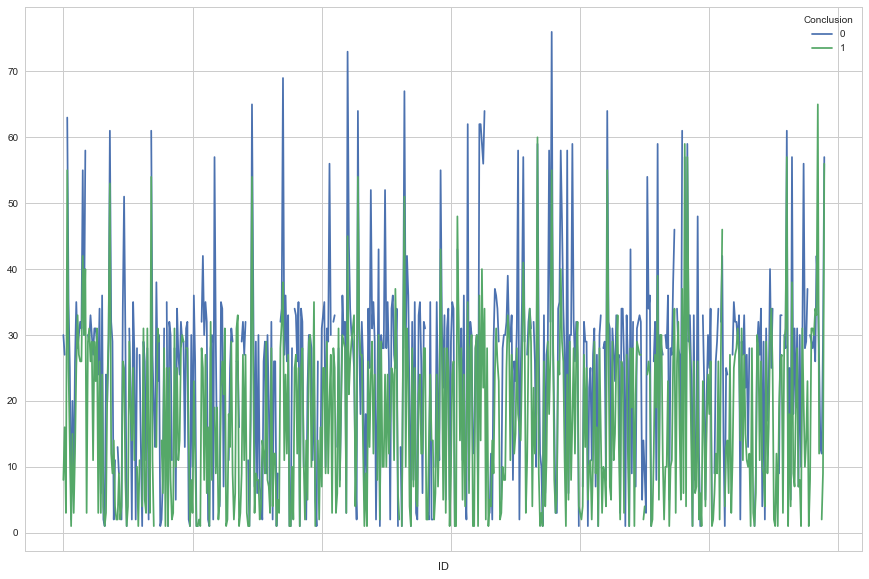

In [14]:
#Data Exploration
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
df1.groupby(['ID', 'Conclusion']).count()['Name'].unstack().plot(ax = ax)

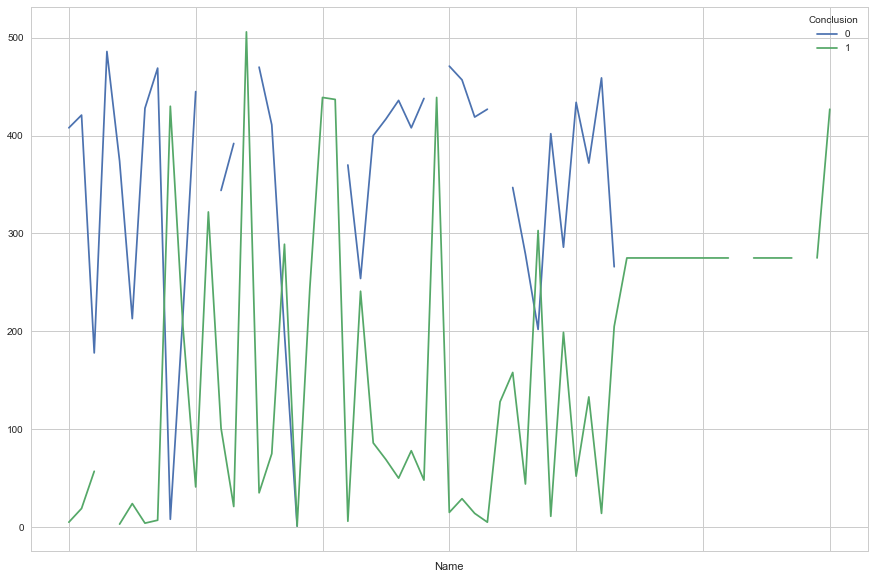

In [15]:
#Data Exploration
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
df1.groupby(['Name', 'Conclusion']).count()['ID'].unstack().plot(ax = ax)

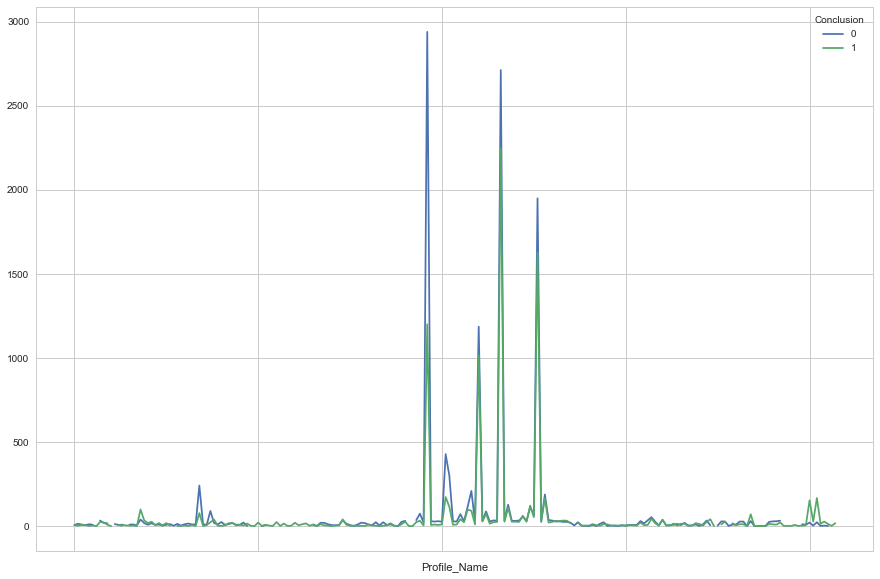

In [16]:
#Data Exploration
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
df1.groupby(['Profile_Name', 'Conclusion']).count()['ID'].unstack().plot(ax = ax)

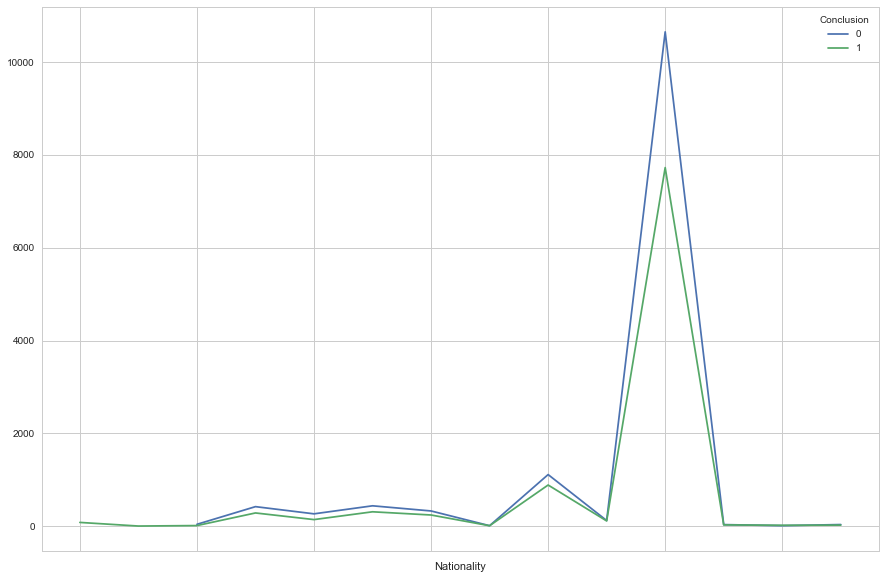

In [17]:
#Data Exploration
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
df1.groupby(['Nationality','Conclusion']).count()['ID'].unstack().plot(ax = ax)

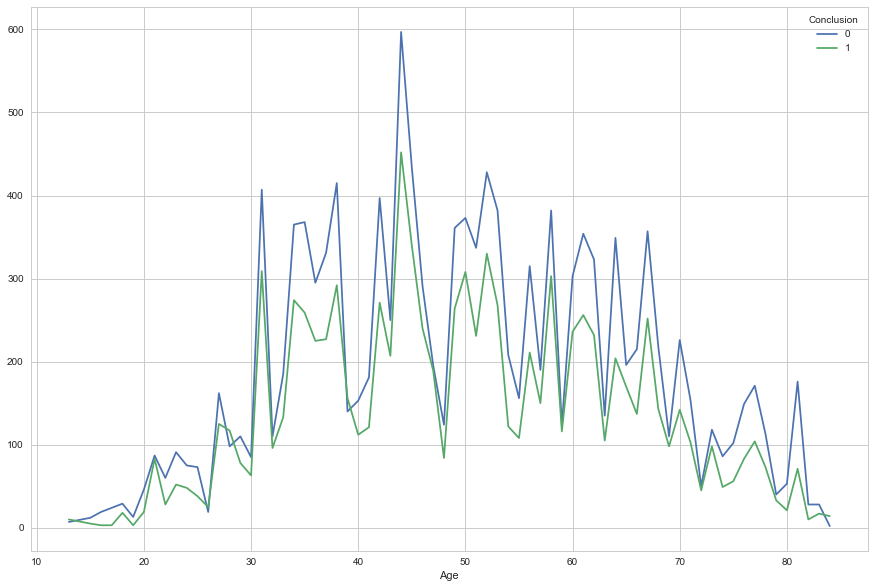

In [18]:
#Data Exploration
%matplotlib inline
fig, ax = plt.subplots(figsize=(15,10))
df1.groupby(['Age','Conclusion']).count()['ID'].unstack().plot(ax = ax)

In [19]:
#Encode Dataset
df_code = pd.get_dummies(df1)
df_code

,CID,Age,Score,Conclusion,Score_Level,T1,T2,SI_Conversion,ID_003d25e3fac5a1d2aa4ba502ffb77b5b,ID_0079e1b73a94ba341f53ca22c6910782,...,Name_Urine Micro organism,Name_Urine Nitrite,Name_Urine PH,Name_Urine Protein,Name_Urine Red Blood Cell,Name_Urine Urobilinogen,Name_Urine White Blood cell,Name_Urine specific gravity,Name_Urine white blood cell,Name_e GFR
0,11,59,4.4,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11,60,4.5,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11,83,4.2,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,76,4.0,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11,58,4.3,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,11,59,4.2,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,11,51,4.2,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,11,52,4.1,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,11,44,3.9,0,1,3.7,5.1,1.0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,11,68,3.9,0,1,3.7,5.1,1.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Fit encoded dataset into smote algorithm
#Use Smore algorithm to generate synthetic data
#Training and Test Set Ratio: .3 to .7
#Convert oversampled data to dataframe object
#Check oversampling results and data proportion
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

df_code = pd.get_dummies(df1)
training_features, test_features, \
training_target, test_target, = train_test_split(df_code.drop(['Conclusion'], axis=1),
                                               df_code['Conclusion'],
                                               test_size = .3,
                                               random_state=0)

x_train, x_val, y_train, y_val = train_test_split(training_features, training_target,
                                                  test_size = .3,
                                                  random_state=0)
sm = SMOTE(random_state=0)
x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
x_train_res = pd.DataFrame(data=x_train_res,columns=x_train.columns )
y_train_res = pd.DataFrame(data=y_train_res,columns=['Conclusion'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(x_train_res))
print("Number of not desirable conclusions in oversampled data",len(y_train_res[y_train_res['Conclusion']==0]))
print("Number of conclusions",len(y_train_res[y_train_res['Conclusion']==1]))
print("Proportion of not desirable conclusions in oversampled data is ",len(y_train_res[y_train_res['Conclusion']==0])/len(x_train_res))
print("Proportion of desirable conclusions in oversampled data is ",len(y_train_res[y_train_res['Conclusion']==1])/len(x_train_res))

length of oversampled data is  13320
Number of not desirable conclusions in oversampled data 6660
Number of conclusions 6660
Proportion of not desirable conclusions in oversampled data is  0.5
Proportion of desirable conclusions in oversampled data is  0.5


In [21]:
#View number of rows in training set before oversampling
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11478 entries, 18163 to 14558
Columns: 1312 entries, CID to Name_e GFR
dtypes: float64(4), int64(3), uint8(1305)
memory usage: 15.0 MB


In [22]:
#View number of rows in training set after oversampling
x_train_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Columns: 1312 entries, CID to Name_e GFR
dtypes: float64(1312)
memory usage: 133.3 MB


In [23]:
#View dataframe after oversampling
x_train_res

,CID,Age,Score,Score_Level,T1,T2,SI_Conversion,ID_003d25e3fac5a1d2aa4ba502ffb77b5b,ID_0079e1b73a94ba341f53ca22c6910782,ID_00d64d073ff05912189aa31bf8ce5d17,...,Name_Urine Micro organism,Name_Urine Nitrite,Name_Urine PH,Name_Urine Protein,Name_Urine Red Blood Cell,Name_Urine Urobilinogen,Name_Urine White Blood cell,Name_Urine specific gravity,Name_Urine white blood cell,Name_e GFR
0,11.000000,44.000000,16.000000,1.0,10.000000,46.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,13.000000,47.000000,1.025000,1.0,1.001000,1.0350,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.0
2,11.000000,43.000000,3.600000,2.0,3.700000,5.1000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,11.000000,61.000000,0.600000,1.0,0.000000,1.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,13.000000,42.000000,3.400000,1.0,2.000000,3.7000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
5,13.000000,37.000000,27.000000,1.0,27.000000,32.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
6,11.000000,77.000000,32.000000,1.0,32.000000,36.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
7,11.000000,42.000000,3.100000,1.0,2.000000,3.7000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
8,11.000000,37.000000,79.000000,2.0,3.900000,6.2000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
9,11.000000,80.000000,5.500000,1.0,4.000000,10.0000,1.0000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [24]:
#View dataframe after oversampling
y_train_res

,Conclusion
0,0
1,0
2,1
3,0
4,0
5,0
6,0
7,0
8,1
9,0


In [25]:
#Add categorical variables to dataframe to allow grouping of dataframe
x_train_res['Test_Date'] = df1['Test_Date']
x_train_res['ID'] = df1['ID']
x_train_res['Profile_Name'] = df1['Profile_Name']
x_train_res['Gender'] = df1['Gender']
x_train_res['Nationality'] = df1['Nationality']

In [26]:
#Select relevant columns in dataframe
x_train1 = x_train_res[['CID', 'ID', 'Gender', 'Age', 'Nationality', 'Profile_Name', 'Test_Date', 'Score', 'Score_Level', 'T1', 'T2', 'SI_Conversion',
       'Name_Albumin ',
'Name_Alkaline Phosphatase ', 
'Name_Alpha Feto- Protein',
'Name_Basophils',
'Name_Calcium ',
'Name_Carcino-embryonic Antigen',
'Name_Chloride ',
'Name_Creatinine ',
'Name_e GFR',
'Name_E.S.R',
'Name_Eosinophils',
'Name_Free T 4',
'Name_Gamma Glutamyltransferase ',
'Name_Globulin ',
'Name_Glucose ',
'Name_Haematocrit',
'Name_Haemoglobin',
'Name_HbA1c ',
'Name_HDL Cholesterol ',
'Name_Hepatitis A Antibodies',
'Name_Hepatitis A Antigen',
'Name_Hepatitis Bs Antibodies',
'Name_Inorganic Phosphate ',
'Name_LDL Cholesterol ',
'Name_Lymphocytes',
'Name_MCH',
'Name_MCHC',
'Name_MCV',
'Name_Monocytes',
'Name_Peipheral Blood film',
'Name_Platelet',
'Name_Polymorph',
'Name_Potassium ',
'Name_Sodium ',
'Name_Stool Occult Blood',
'Name_T.Chol/HDL Cholesterol Ratio ',
'Name_Total Cholesterol ',
'Name_Total Protein ',
'Name_Total Red Cell count',
'Name_Total White Cell count',
'Name_Triglycerides ',
'Name_TSH',
'Name_Urea ',
'Name_Uric Acid ',
'Name_Urine Bilirubin',
'Name_Urine Blood',
'Name_Urine Casts',
'Name_Urine Crystal',
'Name_Urine Epithelial cell',
'Name_Urine Glucose',
'Name_Urine Ketone',
'Name_Urine Micro organism',
'Name_Urine Nitrite',
'Name_Urine PH',
'Name_Urine Protein',
'Name_Urine Red Blood Cell',
'Name_Urine specific gravity',
'Name_Urine Urobilinogen',
'Name_Urine white blood cell'
]]
x_train1

,CID,ID,Gender,Age,Nationality,Profile_Name,Test_Date,Score,Score_Level,T1,...,Name_Urine Glucose,Name_Urine Ketone,Name_Urine Micro organism,Name_Urine Nitrite,Name_Urine PH,Name_Urine Protein,Name_Urine Red Blood Cell,Name_Urine specific gravity,Name_Urine Urobilinogen,Name_Urine white blood cell
0,11.000000,cb1d683b1f24f3c494138f6cbaf2ce4c,M,44.000000,SINGAPOREAN,"LIFE3 MALE,FPSAP",16/01/16,16.000000,1.0,10.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,13.000000,cb1d683b1f24f3c494138f6cbaf2ce4c,M,47.000000,SINGAPOREAN,LIFE3 MALE,10/01/17,1.025000,1.0,1.001000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.000000
2,11.000000,b2fa0f5835ef1847636d5720fc9f30c9,F,43.000000,SINGAPOREAN,"LIFE2,HBA1CP",09/07/16,3.600000,2.0,3.700000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
3,11.000000,3f663f8eadfcf405cb7bdb6bf7e14d1a,F,61.000000,SINGAPOREAN,LIFE1,07/03/17,0.600000,1.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,13.000000,f57a87f0625c6b3e44ce79af78b34f60,F,42.000000,SINGAPOREAN,LIFE2,07/01/16,3.400000,1.0,2.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
5,13.000000,f57a87f0625c6b3e44ce79af78b34f60,F,37.000000,SINGAPOREAN,LIFE1,06/06/17,27.000000,1.0,27.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
6,11.000000,753f1dffc933b14124ba5971430e0dcc,M,77.000000,MALAYSIAN,LIFE3 MALE,11/01/16,32.000000,1.0,32.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
7,11.000000,753f1dffc933b14124ba5971430e0dcc,M,42.000000,MALAYSIAN,LIFE3 MALE,17/12/16,3.100000,1.0,2.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
8,11.000000,0079e1b73a94ba341f53ca22c6910782,F,37.000000,SINGAPOREAN,LIFE1,14/01/16,79.000000,2.0,3.900000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
9,11.000000,ab3e7156a3d9af00b20c7fd97a318bf6,M,80.000000,SINGAPOREAN,LIFE1,07/03/17,5.500000,1.0,4.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [27]:
#View adjusted dataframe columns
x_train1.columns

Index(['CID', 'ID', 'Gender', 'Age', 'Nationality', 'Profile_Name',
       'Test_Date', 'Score', 'Score_Level', 'T1', 'T2', 'SI_Conversion',
       'Name_Albumin ', 'Name_Alkaline Phosphatase ',
       'Name_Alpha Feto- Protein', 'Name_Basophils', 'Name_Calcium ',
       'Name_Carcino-embryonic Antigen', 'Name_Chloride ', 'Name_Creatinine ',
       'Name_e GFR', 'Name_E.S.R', 'Name_Eosinophils', 'Name_Free T 4',
       'Name_Gamma Glutamyltransferase ', 'Name_Globulin ', 'Name_Glucose ',
       'Name_Haematocrit', 'Name_Haemoglobin', 'Name_HbA1c ',
       'Name_HDL Cholesterol ', 'Name_Hepatitis A Antibodies',
       'Name_Hepatitis A Antigen', 'Name_Hepatitis Bs Antibodies',
       'Name_Inorganic Phosphate ', 'Name_LDL Cholesterol ',
       'Name_Lymphocytes', 'Name_MCH', 'Name_MCHC', 'Name_MCV',
       'Name_Monocytes', 'Name_Peipheral Blood film', 'Name_Platelet',
       'Name_Polymorph', 'Name_Potassium ', 'Name_Sodium ',
       'Name_Stool Occult Blood', 'Name_T.Chol/HDL Choleste

In [28]:
#Creating independent variable(X) and dependent variable(y)
y = 'Conclusion'
X1 = x_train1.groupby(['CID', 'ID',
 'Age',
 'Gender',
 'Nationality',
 'Test_Date',
 'Profile_Name',
 'Score',
 'Score_Level',
 'T1',
 'T2',
 'SI_Conversion']).mean().columns.tolist()
X = [i for i in X1 if i not in y]

In [29]:
#View independent Vairables
X1

['Name_Albumin ',
 'Name_Alkaline Phosphatase ',
 'Name_Alpha Feto- Protein',
 'Name_Basophils',
 'Name_Calcium ',
 'Name_Carcino-embryonic Antigen',
 'Name_Chloride ',
 'Name_Creatinine ',
 'Name_e GFR',
 'Name_E.S.R',
 'Name_Eosinophils',
 'Name_Free T 4',
 'Name_Gamma Glutamyltransferase ',
 'Name_Globulin ',
 'Name_Glucose ',
 'Name_Haematocrit',
 'Name_Haemoglobin',
 'Name_HbA1c ',
 'Name_HDL Cholesterol ',
 'Name_Hepatitis A Antibodies',
 'Name_Hepatitis A Antigen',
 'Name_Hepatitis Bs Antibodies',
 'Name_Inorganic Phosphate ',
 'Name_LDL Cholesterol ',
 'Name_Lymphocytes',
 'Name_MCH',
 'Name_MCHC',
 'Name_MCV',
 'Name_Monocytes',
 'Name_Peipheral Blood film',
 'Name_Platelet',
 'Name_Polymorph',
 'Name_Potassium ',
 'Name_Sodium ',
 'Name_Stool Occult Blood',
 'Name_T.Chol/HDL Cholesterol Ratio ',
 'Name_Total Cholesterol ',
 'Name_Total Protein ',
 'Name_Total Red Cell count',
 'Name_Total White Cell count',
 'Name_Triglycerides ',
 'Name_TSH',
 'Name_Urea ',
 'Name_Uric Acid 

In [30]:
#Fit independent variables and dependent variables into logistic regression model
#Use RFE to assess each independent variable's importance and ranking
#Independent variables with support of true will be selected and fit into the Regression Model
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(x_train1[X1], y_train_res.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False  True False False  True
 False False  True False False False False  True  True  True False False
 False False False False False  True False False False False False False
 False False False False False False False False  True  True  True  True
  True  True  True  True  True False  True  True False  True  True]
[12 19 31  3  6 21  8  9  1 36 18  1 30 16  1 28 38 40 22  1  1  1  7 37
 27 26 20 29 24  1 11 14 17 10  2 33 39 15 35 23 32 25 13 34  1  1  1  1
  1  1  1  1  1  5  1  1  4  1  1]


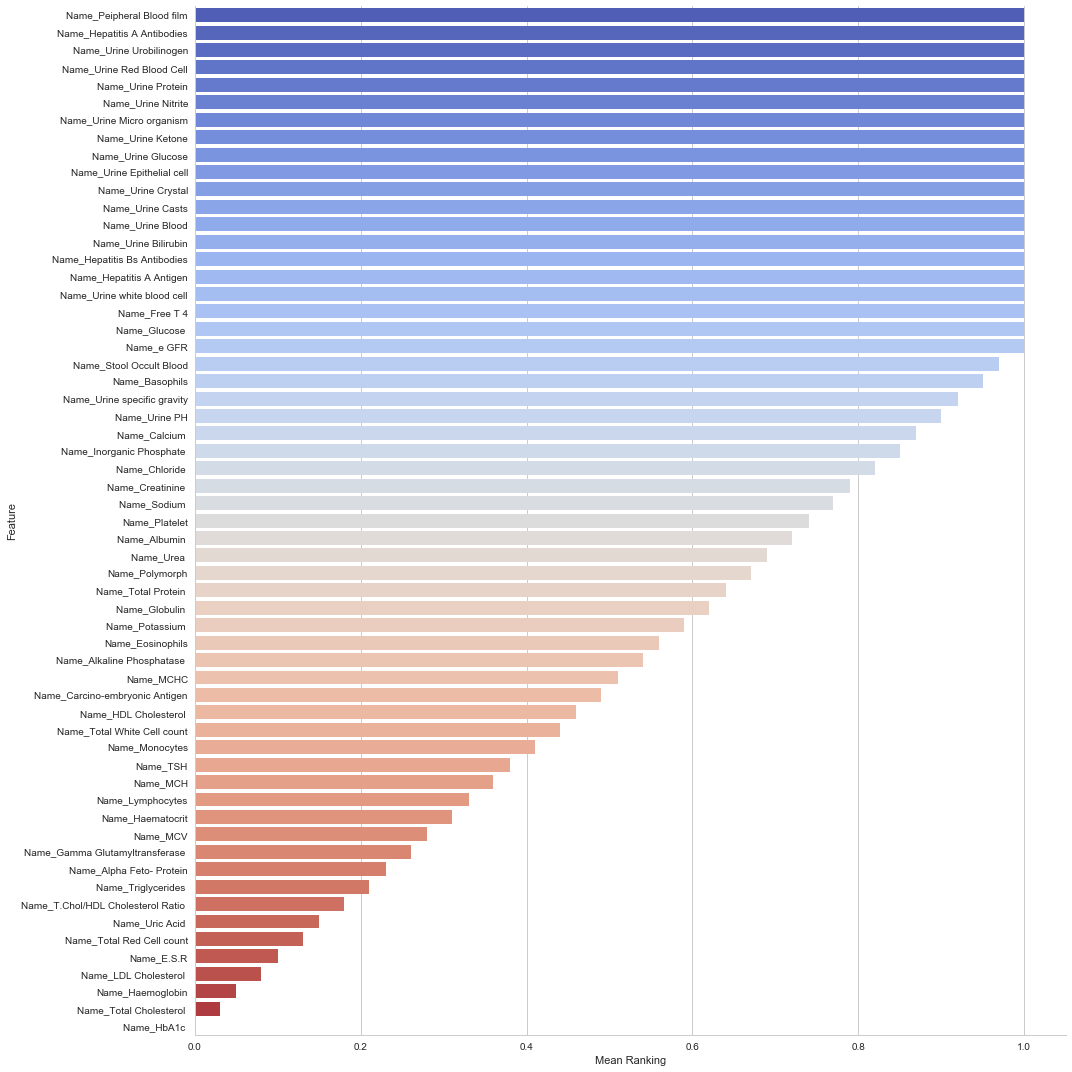

In [31]:
#Visualization of RFE
from sklearn.preprocessing import MinMaxScaler
colnames = X1
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)
# Put the mean scores into a Pandas dataframe

r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")

meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=15, aspect=1.0, palette='coolwarm')

In [32]:
#Features Before over-sampling 
#cols=[ 'Name_Creatinine ',
#  'Name_Direct Bilirubin  ',
#  'Name_Globulin ',
#  'Name_Glucose ',
#  'Name_Haematocrit',
#  'Name_Potassium ',
#  'Name_Sodium ',
#  'Name_Total Protein ',
#  'Name_Uric Acid ',
#  'Name_e GFR'
# ] 
# X=data_final[cols]
# y=data_final['Conclusion']

In [33]:
#features after over-sampling
#Add Selected features into X
#y remains as the dependent variable defined earlier
cols=['Name_e GFR',
  'Name_Free T 4',
  'Name_Glucose ',
  'Name_Hepatitis A Antigen',
  'Name_Urine Bilirubin',
  'Name_Urine Glucose',
  'Name_Urine Ketone',
  'Name_Urine Micro organism',
  'Name_Urine Protein',
  'Name_Urine Red Blood Cell',
  'Name_Urine white blood cell'    
] 
X=x_train1[cols]
y=y_train_res['Conclusion']


In [34]:
#Logistic Regression Results Summary
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.552038
         Iterations: 35
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.204     
Dependent Variable:          Conclusion              AIC:                     14728.2961
Date:                        2018-10-22 12:25        BIC:                     14810.7634
No. Observations:            13320                   Log-Likelihood:          -7353.1   
Df Model:                    10                      LL-Null:                 -9232.7   
Df Residuals:                13309                   LLR p-value:             0.0000    
Converged:                   0.0000                  Scale:                   1.0000    
No. Iterations:              35.0000                                                    
----------------------------------------------------------------------------------------
                              Coef.     Std.Err.    z    P>|z|     [0.025       0

C:\Users\L30908\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [35]:
#Implement Logistic Regression and Split adjusted data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
#View accuracy of logistic Regression Model
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(logreg.score(x_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on training set: 0.70
Accuracy of logistic regression classifier on test set: 0.71


In [37]:
#View Cross validation accuracy of model
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=0)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, x_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.697


In [38]:
#view confusion matrix of model to evaluate its accuracy and performance
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[2039    0]
 [1172  785]]


In [39]:
#View performace of model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.64      1.00      0.78      2039
          1       1.00      0.40      0.57      1957

avg / total       0.81      0.71      0.68      3996



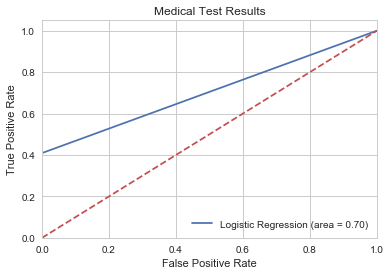

In [40]:
#Visualization of model's performance
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Medical Test Results')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()